In [1]:
import numpy as np

np.random.seed(0)

In [2]:
import torch

torch.manual_seed(42)

In [3]:
N = 100

# Generate random x values
x = 10 * torch.randn(N)

x

tensor([ 1.9269e+01,  1.4873e+01,  9.0072e+00, -2.1055e+01,  6.7842e+00,
        -1.2345e+01, -4.3067e-01, -1.6047e+01, -7.5214e+00,  1.6487e+01,
        -3.9248e+00, -1.4036e+01, -7.2788e+00, -5.5943e+00, -7.6884e+00,
         7.6245e+00,  1.6423e+01, -1.5960e+00, -4.9740e+00,  4.3959e+00,
        -7.5813e+00,  1.0783e+01,  8.0080e+00,  1.6806e+01,  1.2791e+01,
         1.2964e+01,  6.1047e+00,  1.3347e+01, -2.3162e+00,  4.1759e-01,
        -2.5158e+00,  8.5986e+00, -1.3847e+01, -8.7124e+00, -2.2337e+00,
         1.7174e+01,  3.1888e+00, -4.2452e+00,  3.0572e+00, -7.7459e+00,
        -1.5576e+01,  9.9564e+00, -8.7979e+00, -6.0114e+00, -1.2742e+01,
         2.1228e+01, -1.2347e+01, -4.8791e+00, -9.1382e+00, -6.5814e+00,
         7.8024e-01,  5.2581e+00, -4.8799e+00,  1.1914e+01, -8.1401e+00,
        -7.3599e+00, -1.4032e+01,  3.6004e-01, -6.3477e-01,  6.7561e+00,
        -9.7807e-01,  1.8446e+01, -1.1845e+01,  1.3835e+01,  1.4451e+01,
         8.5641e+00,  2.2181e+01,  5.2317e+00,  3.4

In [4]:
# Compute function outputs
y = 1.5 * x + 2.73

y

tensor([ 31.6337,  25.0393,  16.2408, -28.8528,  12.9063, -15.7882,   2.0840,
        -21.3400,  -8.5520,  27.4608,  -3.1572, -18.3241,  -8.1882,  -5.6615,
         -8.8026,  14.1667,  27.3648,   0.3360,  -4.7310,   9.3238,  -8.6420,
         18.9048,  14.7420,  27.9393,  21.9169,  22.1763,  11.8870,  22.7511,
         -0.7444,   3.3564,  -1.0436,  15.6279, -18.0401, -10.3385,  -0.6205,
         28.4904,   7.5132,  -3.6378,   7.3158,  -8.8889, -20.6336,  17.6645,
        -10.4668,  -6.2871, -16.3823,  34.5718, -15.7898,  -4.5887, -10.9773,
         -7.1421,   3.9004,  10.6171,  -4.5899,  20.6005,  -9.4801,  -8.3099,
        -18.3187,   3.2701,   1.7778,  12.8642,   1.2629,  30.3989, -15.0381,
         23.4832,  24.4070,  15.5762,  36.0011,  10.5775,   7.9297,  -0.2300,
        -13.0888,  21.8999,   0.1471,  10.5868,   3.5793,   9.1244,  11.3551,
         -6.8959, -30.3660,  -8.5320,   2.8930,  -2.3511, -17.3802,  -6.0506,
         12.3413,  11.4787,  18.7339,  -4.0223,  -7.4513,  11.34

In [5]:
# Add random noise to get the observed value of y
y_obs = y + (0.5 * torch.randn(N))

y_obs

tensor([ 31.9968,  25.0848,  16.0462, -28.5889,  13.4218, -16.1406,   2.5906,
        -21.5054,  -8.0045,  27.6308,  -2.7972, -18.1184,  -8.4749,  -5.4080,
         -9.0402,  13.9207,  27.2967,   1.1537,  -4.4036,   9.6118,  -8.8224,
         18.8745,  14.7786,  28.3486,  21.7292,  22.6929,  11.5437,  23.0695,
         -0.6356,   3.3331,  -1.7604,  15.3446, -17.9054, -10.4437,  -0.9869,
         28.5426,   8.0339,  -3.8376,   6.1691,  -8.6401, -21.8736,  17.4558,
        -11.0645,  -5.8810, -16.5354,  34.4067, -16.2802,  -4.4913, -10.8339,
         -7.5075,   3.9878,  10.0702,  -4.1082,  20.4458,  -9.1945,  -7.7509,
        -19.0921,   3.6484,   2.1656,  13.8775,   1.7535,  30.0789, -15.2835,
         23.5872,  23.9410,  14.7807,  35.4331,  10.3162,   8.2880,   0.5368,
        -13.8143,  21.5069,   0.6586,  10.3089,   3.9315,   9.4794,  10.5888,
         -7.2584, -30.1328,  -8.1987,   2.3054,  -2.1721, -17.1408,  -5.3737,
         12.9929,  11.7226,  19.3009,  -4.2001,  -7.2704,  12.34

In [6]:
# Random initialization of model parameters
w = torch.randn(1)
b = torch.randn(1)

print(w, b)

tensor([0.3932]) tensor([-0.2148])


In [7]:
# Training: repeatative adjustment of parameters via gradient.
num_steps = 4000

learning_rate = 1e-3

for step in range(num_steps):
    y_pred = w*x + b
    mean_squared_error = torch.mean((y_pred - y_obs) ** 2)
    
    # Gradient of error computation using calculus formulas.
    w_grad = torch.mean(2 * ((y_pred - y_obs)* x))
    b_grad = torch.mean(2 * (y_pred - y_obs))
    
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    
    # periodically print diagnostic messages
    if step % 400 == 0:
        print("Step {}: w = {} b = {} \nMSE Error = {}".format(step, w,  b, mean_squared_error))
        print("Gradient of w: {} \nGradient of b: {}".format(w_grad, b_grad))

Step 0: w = tensor([0.6108]) b = tensor([-0.2075]) 
MSE Error = 131.45994567871094
Gradient of w: -217.66844177246094 
Gradient of b: -7.248963832855225
Step 400: w = tensor([1.5089]) b = tensor([1.4195]) 
MSE Error = 1.9599539041519165
Gradient of w: 0.016568755730986595 
Gradient of b: -2.6519477367401123
Step 800: w = tensor([1.5043]) b = tensor([2.1497]) 
MSE Error = 0.5529757738113403
Gradient of w: 0.007476482540369034 
Gradient of b: -1.1942120790481567
Step 1200: w = tensor([1.5023]) b = tensor([2.4785]) 
MSE Error = 0.26766437292099
Gradient of w: 0.0033882809802889824 
Gradient of b: -0.5377742648124695
Step 1600: w = tensor([1.5013]) b = tensor([2.6265]) 
MSE Error = 0.2098071128129959
Gradient of w: 0.0015091609675437212 
Gradient of b: -0.24216799437999725
Step 2000: w = tensor([1.5009]) b = tensor([2.6932]) 
MSE Error = 0.19807462394237518
Gradient of w: 0.0006666564731858671 
Gradient of b: -0.10905147343873978
Step 2400: w = tensor([1.5007]) b = tensor([2.7232]) 
MSE Er

In [8]:
print("True function: y = 1.5*x + 2.73")
print("Learnt function: y_pred = {}*x + {}".format(w[0], b[0]))

True function: y = 1.5*x + 2.73
Learnt function: y_pred = 1.5005970001220703*x + 2.746823787689209


# Linear approximation of nonlinear data

In [9]:
torch.manual_seed(0)
N = 100

# Generate random x values
x = 10 * torch.rand(N, 1)

# Compute true function outputs 
y = x**2 - x + 2.0

# Add some random noise to get observed values of y
y_obs = y + (0.5 * torch.rand(N, 1) - 0.25)

y_obs

tensor([[21.8997],
        [53.5027],
        [ 1.7890],
        [ 2.3600],
        [ 8.1385],
        [35.8603],
        [20.9300],
        [73.2040],
        [18.1896],
        [35.6956],
        [10.5813],
        [14.2688],
        [ 1.6745],
        [ 3.3896],
        [ 7.8695],
        [23.4904],
        [43.6351],
        [58.0130],
        [ 3.0192],
        [ 7.2042],
        [41.7410],
        [76.6210],
        [13.6759],
        [69.7916],
        [15.1564],
        [26.8934],
        [83.1810],
        [ 1.6474],
        [ 3.4913],
        [12.0050],
        [ 8.2044],
        [79.5959],
        [ 3.1725],
        [ 6.5698],
        [ 2.9426],
        [ 1.7577],
        [ 4.2575],
        [79.1331],
        [47.1082],
        [49.8419],
        [24.6726],
        [ 5.6591],
        [30.5662],
        [ 1.7603],
        [ 2.3125],
        [ 5.3269],
        [60.5145],
        [56.9771],
        [ 6.8357],
        [20.2173],
        [60.7722],
        [91.2325],
        [43.

In [12]:
import matplotlib.pyplot as plt

def draw_parabola(w0, w1, w2,  min_x=0, max_x=10,
                  color='magenta', label=None):
    """
    Plots y = w0 + w1*x + w2*x^2 from interval
    (min_x to max_x)
    """
    x = np.linspace(min_x, max_x, 100)
    y = w0 + w1*x + w2 * (x**2)
    plt.plot(x, y, color=color,
             label='y=%0.2f+ %0.2fx + %0.2fx^2'
             % (w0, w1, w2) if not label else label)

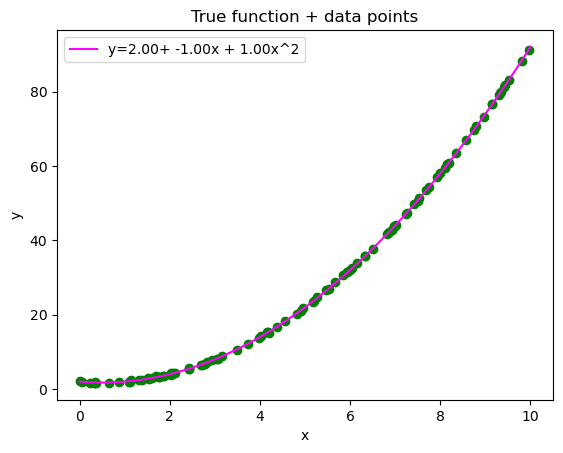

In [14]:
# Plot the true function and the data points.
# True y values (magenta) will fall on a parabola.
# The noise-added observed values (green points)
#  will fall around that parabola.


plt.scatter(x.data, y_obs.data, color="green")
draw_parabola(2, -1, 1)
plt.title('True function + data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

In [15]:
# First, let us try a
# linear model y_pred = wx + b
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

params = [b, w]

params

[tensor([0.8223], requires_grad=True), tensor([0.5210], requires_grad=True)]

In [18]:
def draw_subplot(pos, step,
                 true_draw_func, true_draw_params,
                 pred_draw_func, pred_draw_params):
    """
    Plots the curves corresponding to a specified pair
    of functions.
    We use it to plot
    (i) the true function (used to generate the observations
        that we are trying to predict with a trained mode)
    vis a vis
    (ii) the model function (used to makes the predictions)
         When the predictor is good, the two plots should
         more or less coincide.
    Thus this is used to visualize the goodness of the
    current approximation.
    """
    plt.subplot(2, 2, pos)
    plt.title('Step %d'%(step))
    true_draw_func(**true_draw_params)
    pred_draw_func(**pred_draw_params)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')

In [19]:
def draw_line(m, c, min_x=0, max_x=10,
              color='magenta', label=None):
    """
    Plots y = mx + c from interval (min_x to max_x)
    """
    # linspace creates an array of equally spaced
    # values between the specified min and max in 
    # specified number of steps.
    x = np.linspace(min_x, max_x, 100)
    y = m*x + c
    
    plt.plot(x, y, color=color, 
             label='y=%0.2fx+%0.2f'%(m, c)\
                 if not label else label)

In [20]:
def update_parameters(params, learning_rate):
    """
    Update the current weight and bias values
    from gradient values.
    """
    # Don't track gradients while updating params
    with torch.no_grad():
        for i, p in enumerate(params):
            params[i] = p - learning_rate * p.grad
            
    # Restore tracking of gradient for all params
    for i in range(len(params)):
        params[i].requires_grad = True

/home/davinci/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Step 0: w = tensor([0.5210]) b = tensor([0.8223]) 
MSE Error = 1327.32177734375
Gradient of w: tensor([-398.0006]) 
Gradient of b: tensor([-52.3423])
Step 100: w = tensor([7.4348]) b = tensor([-4.4308]) 
MSE Error = 74.19503784179688
Gradient of w: tensor([-0.7114]) 
Gradient of b: tensor([4.6875])
Step 200: w = tensor([7.9912]) b = tensor([-8.0973]) 
MSE Error = 60.17138671875
Gradient of w: tensor([-0.4234]) 
Gradient of b: tensor([2.7899])
Step 300: w = tensor([8.3224]) b = tensor([-10.2795]) 
MSE Error = 55.203895568847656
Gradient of w: tensor([-0.2520]) 
Gradient of b: tensor([1.6604])
Step 400: w = tensor([8.5195]) b = tensor([-11.5783]) 
MSE Error = 53.444305419921875
Gradient of w: tensor([-0.1500]) 
Gradient of b: tensor([0.9882])
Step 500: w = tensor([8.6368]) b = tensor([-12.3512]) 
MSE Error = 52.821014404296875
Gradient of w: tensor([-0.0893]) 
Gradient of b: tensor([0.5882])
Step 600: w = tensor([8.7066]) b = tensor([-12.8113]) 
MSE Error = 52.60023498535156
Gradient of 

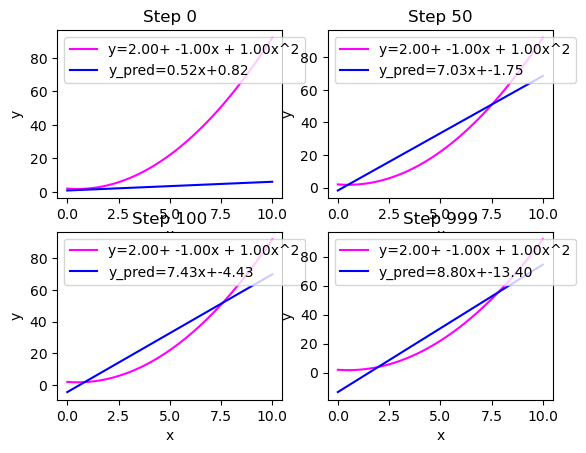

In [21]:
num_steps = 1000
learning_rate = 1e-2

plt.figure()
i = 1
plot_steps = [0, 50, 100, 999]

# Train model iteratively
for step in range(num_steps):
    # linear model
    y_pred = params[0] + params[1] * x
    # Periodically plot the true function and current approximation to check how we are doing
    if step in plot_steps:
        draw_subplot(i, step, draw_parabola, {"w0": 2, "w1": -1, "w2": 1}, draw_line, {"m": params[1].data.numpy()[0],
                     "c": params[0].data.numpy()[0],
                     "color": "blue",
                     "label": "y_pred=%0.2fx+%0.2f"
            % (params[1].data.numpy()[0],
               params[0].data.numpy()[0])}
        )
        i += 1

    mean_squared_error = torch.mean((y_pred - y_obs) ** 2)
    mean_squared_error.backward()

    if step % 100 == 0:
        print("Step {}: w = {} b = {} \nMSE Error = {}"
              .format(step, params[1].data,
                      params[0].data,
                      mean_squared_error))
        print("Gradient of w: {} \nGradient of b: {}"
              .format(params[1].grad, params[0].grad))
        
    update_parameters(params, learning_rate)

Step 0:
w0 = tensor([1.4875]) w1 = tensor([-0.2230]) w2 = tensor([-1.0057])
MSE Error = 7090.93505859375
Gradient of w0: tensor([-123.5347]) 
Gradient of w1: tensor([-927.7972])
Gradient of w1: tensor([-7398.9434])
Step 20000:
w0 = tensor([1.4473]) w1 = tensor([-0.7683]) w2 = tensor([0.9801])
MSE Error = 0.044630616903305054
Gradient of w0: tensor([-0.0930]) 
Gradient of w1: tensor([0.0411])
Gradient of w1: tensor([-0.0038])
Step 40000:
w0 = tensor([1.6002]) w1 = tensor([-0.8353]) w2 = tensor([0.9859])
MSE Error = 0.030484532937407494
Gradient of w0: tensor([-0.0619]) 
Gradient of w1: tensor([0.0271])
Gradient of w1: tensor([-0.0023])
Step 60000:
w0 = tensor([1.7020]) w1 = tensor([-0.8798]) w2 = tensor([0.9898])
MSE Error = 0.024226026609539986
Gradient of w0: tensor([-0.0412]) 
Gradient of w1: tensor([0.0181])
Gradient of w1: tensor([-0.0015])
Step 80000:
w0 = tensor([1.7696]) w1 = tensor([-0.9094]) w2 = tensor([0.9924])
MSE Error = 0.021457994356751442
Gradient of w0: tensor([-0.0274

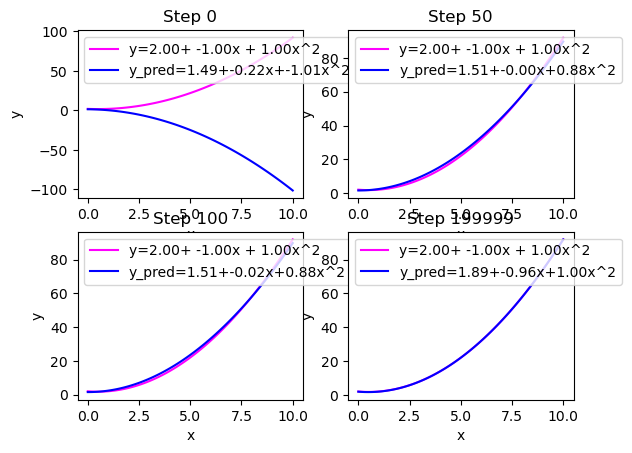

In [22]:
# Try quadratic model architecture:
# y_pred = w0 + w1*x + w2*x^2
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
params = [w0, w1, w2]

plt.figure()
i = 1

learning_rate = 1e-4
num_steps = 200000
plot_steps = [0, 50, 100, 199999]

for step in range(num_steps):
    # quadratic model architecture:
    # y_pred = w0 + w1*x + w2*x^2
    y_pred = params[0] + params[1] * x + params[2] * (x**2)

    # Periodically plot the true function and
    # current approximation to check how we are doing
    if step in plot_steps:
        draw_subplot(i, step, draw_parabola,
                     {"w0": 2, "w1": -1, "w2": 1},
                     draw_parabola,
                     {"w0": params[0].data.numpy()[0],
                         "w1": params[1].data.numpy()[0],
                         "w2": params[2].data.numpy()[0],
                      "color": "blue",
                      "label": "y_pred=%0.2f+%0.2fx+%0.2fx^2"
                      % (params[0].data.numpy()[0],
                         params[1].data.numpy()[0],
                         params[2].data.numpy()[0])}
                     )
        i += 1

    # Mean Squared Error (M.S.E)
    # i.e (y_pred - y_obs)^2
    mean_squared_error = torch.mean((y_pred -
                                     y_obs) ** 2)

    # Back propogate. Computes the partial derivative
    # of error with respect to each variable and stores it
    # within the grad field of the variable.
    mean_squared_error.backward()
    if step % 20000 == 0:
        print("Step {}:\nw0 = {} w1 = {} w2 = {}\n"
              "MSE Error = {}"
              .format(step, params[0].data, params[1].data,
                      params[2].data, mean_squared_error))
        print("Gradient of w0: {} \nGradient of w1: {}\n"
              "Gradient of w1: {}"
              .format(params[0].grad, params[1].grad,
                      params[2].grad))

    # Crucial step, adjust the parameters (weights and bias)
    # using the gradients (partial derivatives) computed during
    # the call to backward() above
    update_parameters(params, learning_rate)

# example of using torch for learning

In [23]:
X = torch.tensor([[0.11, 0.09], [0.01, 0.02], [0.98, 0.91],
              [0.12, 0.21], [0.98, 0.99], [0.85, 0.87],
              [0.03, 0.14], [0.55, 0.45], [0.49, 0.51], 
              [0.99, 0.01], [0.02, 0.89], [0.31, 0.47],
              [0.55, 0.29], [0.87, 0.76], [0.63, 0.24]], dtype=torch.float)

X = torch.column_stack((X, torch.ones(15))) 

X

tensor([[0.1100, 0.0900, 1.0000],
        [0.0100, 0.0200, 1.0000],
        [0.9800, 0.9100, 1.0000],
        [0.1200, 0.2100, 1.0000],
        [0.9800, 0.9900, 1.0000],
        [0.8500, 0.8700, 1.0000],
        [0.0300, 0.1400, 1.0000],
        [0.5500, 0.4500, 1.0000],
        [0.4900, 0.5100, 1.0000],
        [0.9900, 0.0100, 1.0000],
        [0.0200, 0.8900, 1.0000],
        [0.3100, 0.4700, 1.0000],
        [0.5500, 0.2900, 1.0000],
        [0.8700, 0.7600, 1.0000],
        [0.6300, 0.2400, 1.0000]])

In [26]:
y = torch.tensor([-0.8, -0.97, 0.89, -0.67, 0.97, 0.72,
              -0.83, 0.00, 0.00, 0.00, -0.09, -0.22, 
              -0.16, 0.63, 0.37], dtype=torch.float)

y

tensor([-0.8000, -0.9700,  0.8900, -0.6700,  0.9700,  0.7200, -0.8300,  0.0000,
         0.0000,  0.0000, -0.0900, -0.2200, -0.1600,  0.6300,  0.3700])

In [27]:
solution_pseudo = torch.matmul(torch.matmul(
    torch.linalg.inv(torch.matmul(X.T, X)), X.T), y)
print("Solution via pseudo inverse: {}".format(solution_pseudo))

Solution via pseudo inverse: tensor([ 1.0766,  0.8976, -0.9582])


In [28]:
y = y.reshape((-1, 1))
y

tensor([[-0.8000],
        [-0.9700],
        [ 0.8900],
        [-0.6700],
        [ 0.9700],
        [ 0.7200],
        [-0.8300],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0900],
        [-0.2200],
        [-0.1600],
        [ 0.6300],
        [ 0.3700]])

In [29]:
# Let us define the torch module
class LinearModel(torch.nn.Module):
    def __init__(self, num_features):
        super(LinearModel, self).__init__()
        self.w = torch.nn.Parameter(
            torch.randn(num_features, 1))
    
    def forward(self, X):
        """
        In the forward function we accept a Tensor of input data 
        and we must return a Tensor of output data. 
        We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        y_pred  = torch.mm(X, self.w) # Computes Xw
        return y_pred

In [30]:
num_unknowns = 3
model =  LinearModel(num_features=num_unknowns)

In [31]:
# Let us use  Pytorch MSE loss function
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [32]:
# Train model iteratively
num_steps = 1000
for step in range(num_steps):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    if step % 100 == 0:
        print("Loss at step {}: {}".format(step, loss))
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    # Compute the gradients for this step
    loss.backward()
    # Gradient descent
    optimizer.step()

Loss at step 0: 4.312058448791504
Loss at step 100: 0.24243079125881195
Loss at step 200: 0.21768641471862793
Loss at step 300: 0.21724480390548706
Loss at step 400: 0.21723631024360657
Loss at step 500: 0.21723616123199463
Loss at step 600: 0.21723614633083344
Loss at step 700: 0.21723619103431702
Loss at step 800: 0.21723619103431702
Loss at step 900: 0.21723619103431702


In [33]:
solution_gd = torch.squeeze(model.w.data)
print("The solution via gradient descent is {}".format(solution_gd))

assert torch.allclose(solution_pseudo, solution_gd)

The solution via gradient descent is tensor([ 1.0766,  0.8976, -0.9582])
